In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [4]:
class Block(tf.keras.layers.Layer):
    def __init__(self,dim,subblocks=3):
        super().__init__()
        self.dim = dim
        self.padding = tf.keras.layers.ZeroPadding2D(subblocks)
        self.subblocks = [tf.keras.layers.Conv2D(dim,3,activation=mish,use_bias=False) for _ in range(subblocks)]
        
        self.rep_input = tf.keras.layers.Conv2D(dim//2,1)
        self.rep_x = tf.keras.layers.Conv2D(dim//2,1)
        self.ret_att = False
        
    def build(self,inp_shape):
        if inp_shape[-1] != self.dim:
            self.transfer = tf.keras.layers.Conv2D(self.dim,1,use_bias=False)
            self.need_transfer = True
        else:
            self.need_transfer = False
        
    def call(self,inp):
        x = self.padding(inp)
        for s in self.subblocks:
            x = s(x)
        
        att = self.rep_x(x)*self.rep_input(inp)
        att = tf.math.reduce_sum(att,axis=-1,keepdims=True)
        att = tf.keras.activations.sigmoid(att)
        
        if self.need_transfer:
            inp = self.transfer(inp)
        
        x = att*inp + (1-att)*x
        if self.ret_att:
            return x,att
        else:
            return x

In [5]:
model = tf.keras.Sequential([
#     Block(8),tf.keras.layers.AveragePooling2D(2,2), #16
    Block(8),tf.keras.layers.MaxPooling2D(2,2), #16
#     Block(8),
#     Block(8),tf.keras.layers.AveragePooling2D(2,2), #8
    Block(8),tf.keras.layers.MaxPooling2D(2,2), #8
#     Block(8),
#     Block(16),tf.keras.layers.AveragePooling2D(2,2), #4
    Block(16),tf.keras.layers.MaxPooling2D(2,2), #4
#     Block(16),
#     Block(16),tf.keras.layers.AveragePooling2D(2,2), #2
    Block(16),tf.keras.layers.MaxPooling2D(2,2), #2
#     Block(16),
#     Block(32),tf.keras.layers.AveragePooling2D(2,2), #1
    Block(32),tf.keras.layers.MaxPooling2D(2,2), #1
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation=mish),
    tf.keras.layers.Dense(32,activation=mish),
    tf.keras.layers.Dense(16,activation=mish),
    tf.keras.layers.Dense(10),
])

In [6]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# AveragePooling 20 Epochs

In [7]:
model.fit(x_train/255,y_train,batch_size=16,epochs=10,validation_data=(x_test/255, y_test))

Epoch 1/10
3125/3125 [==============================] - 151s 47ms/step - loss: 1.9155 - sparse_categorical_accuracy: 0.2848 - val_loss: 1.7568 - val_sparse_categorical_accuracy: 0.3649
Epoch 2/10
3125/3125 [==============================] - 146s 47ms/step - loss: 1.5968 - sparse_categorical_accuracy: 0.4106 - val_loss: 1.4793 - val_sparse_categorical_accuracy: 0.4440
Epoch 3/10
3125/3125 [==============================] - 153s 49ms/step - loss: 1.4358 - sparse_categorical_accuracy: 0.4718 - val_loss: 1.3652 - val_sparse_categorical_accuracy: 0.5006
Epoch 4/10
3125/3125 [==============================] - 152s 49ms/step - loss: 1.3174 - sparse_categorical_accuracy: 0.5187 - val_loss: 1.2672 - val_sparse_categorical_accuracy: 0.5392
Epoch 5/10
3125/3125 [==============================] - 150s 48ms/step - loss: 1.2287 - sparse_categorical_accuracy: 0.5544 - val_loss: 1.2566 - val_sparse_categorical_accuracy: 0.5532 sp
Epoch 6/10
3125/3125 [==============================] - 150s 48ms/step -

In [8]:
model.fit(x_train/255,y_train,batch_size=16,epochs=10,validation_data=(x_test/255, y_test))

Epoch 1/10
3125/3125 [==============================] - 151s 48ms/step - loss: 0.9024 - sparse_categorical_accuracy: 0.6802 - val_loss: 0.9482 - val_sparse_categorical_accuracy: 0.6690
Epoch 2/10
3125/3125 [==============================] - 155s 50ms/step - loss: 0.8687 - sparse_categorical_accuracy: 0.6935 - val_loss: 0.9225 - val_sparse_categorical_accuracy: 0.6758
Epoch 3/10
3125/3125 [==============================] - 144s 46ms/step - loss: 0.8413 - sparse_categorical_accuracy: 0.7017 - val_loss: 0.9287 - val_sparse_categorical_accuracy: 0.6744
Epoch 4/10
3125/3125 [==============================] - 147s 47ms/step - loss: 0.8131 - sparse_categorical_accuracy: 0.7131 - val_loss: 0.8818 - val_sparse_categorical_accuracy: 0.6947
Epoch 5/10
3125/3125 [==============================] - 146s 47ms/step - loss: 0.7920 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.8986 - val_sparse_categorical_accuracy: 0.6924
Epoch 6/10
3125/3125 [==============================] - 147s 47ms/step - lo

# MaxPooling 20 Epochs

In [7]:
model.fit(x_train/255,y_train,batch_size=16,epochs=20,validation_data=(x_test/255, y_test))

Epoch 1/20
3125/3125 [==============================] - 166s 52ms/step - loss: 1.7521 - sparse_categorical_accuracy: 0.3359 - val_loss: 1.4737 - val_sparse_categorical_accuracy: 0.4545
Epoch 2/20
3125/3125 [==============================] - 168s 54ms/step - loss: 1.4340 - sparse_categorical_accuracy: 0.4741 - val_loss: 1.3534 - val_sparse_categorical_accuracy: 0.5048
Epoch 3/20
3125/3125 [==============================] - 160s 51ms/step - loss: 1.2926 - sparse_categorical_accuracy: 0.5299 - val_loss: 1.2478 - val_sparse_categorical_accuracy: 0.5482
Epoch 4/20
3125/3125 [==============================] - 160s 51ms/step - loss: 1.1959 - sparse_categorical_accuracy: 0.5664 - val_loss: 1.1647 - val_sparse_categorical_accuracy: 0.5790
Epoch 5/20
3125/3125 [==============================] - 162s 52ms/step - loss: 1.1235 - sparse_categorical_accuracy: 0.5931 - val_loss: 1.1119 - val_sparse_categorical_accuracy: 0.5965
Epoch 6/20
3125/3125 [==============================] - 155s 50ms/step - lo

KeyboardInterrupt: 

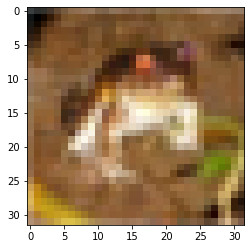

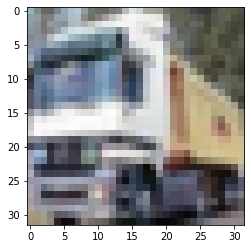

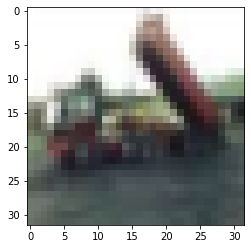

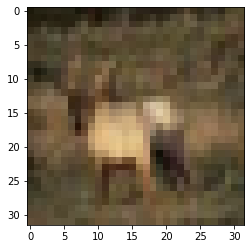

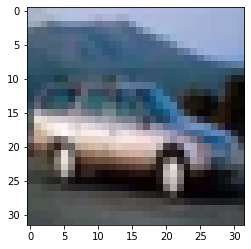

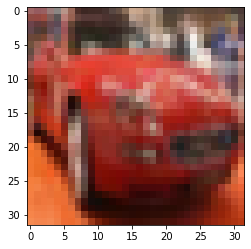

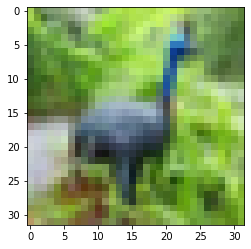

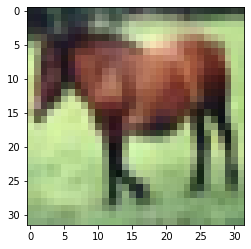

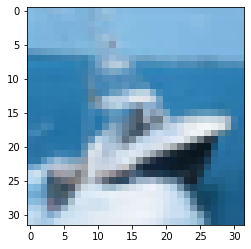

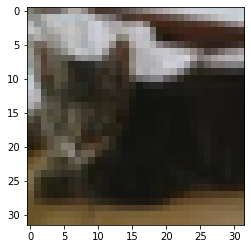

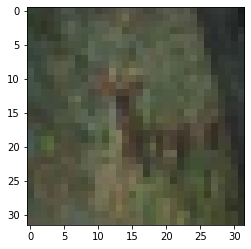

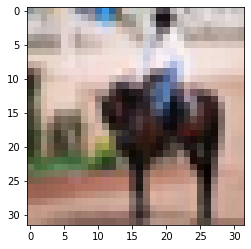

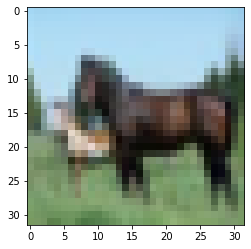

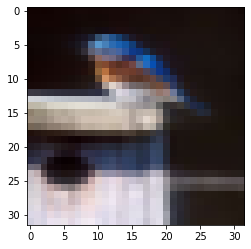

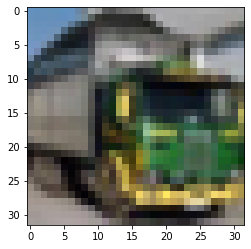

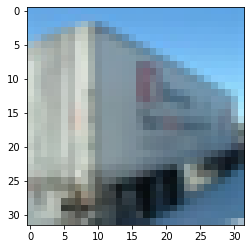

In [8]:
for img in (x_train/255)[:16]:
    plt.imshow(img)
    plt.show()

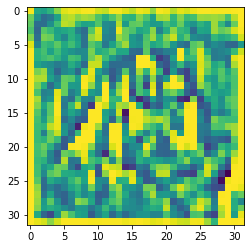

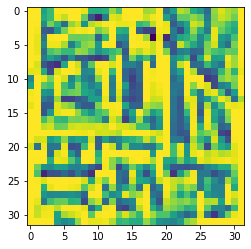

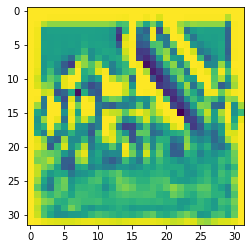

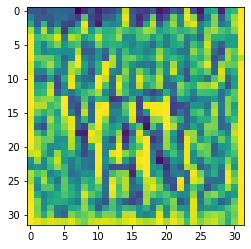

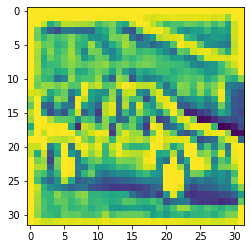

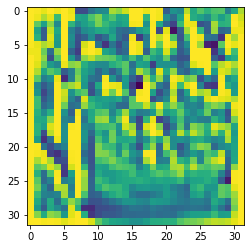

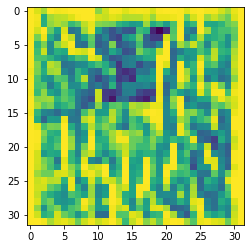

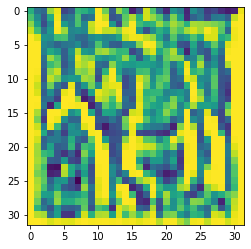

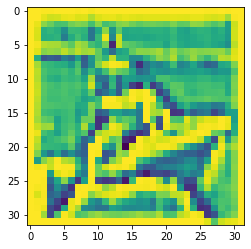

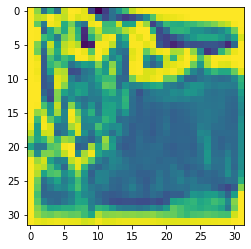

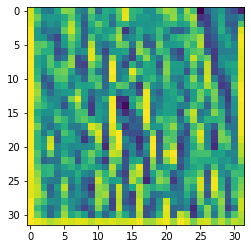

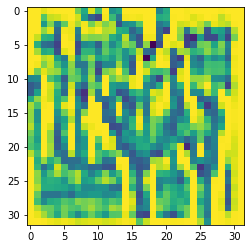

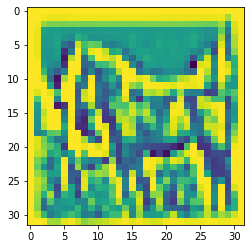

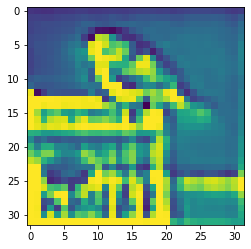

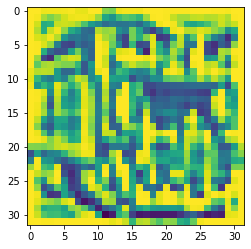

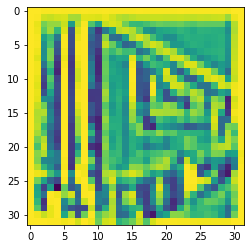

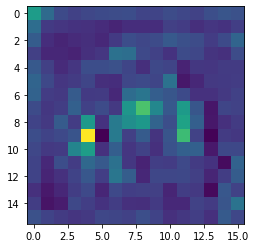

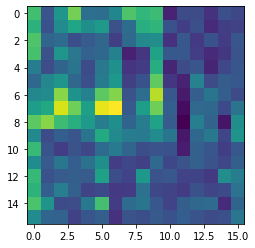

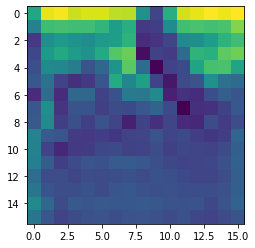

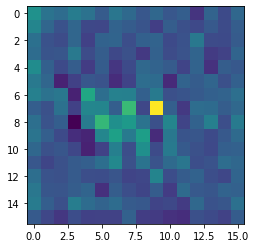

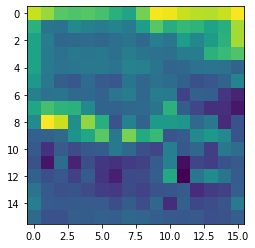

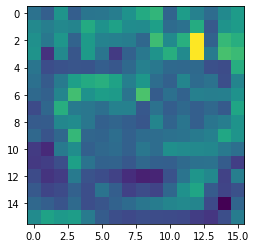

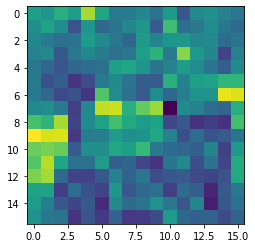

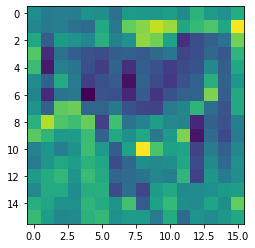

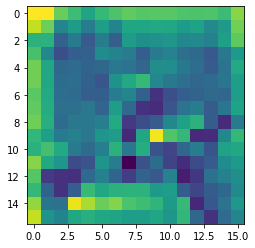

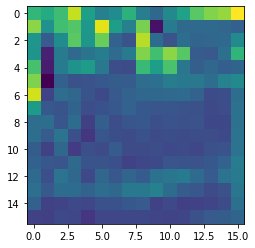

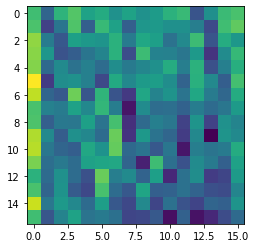

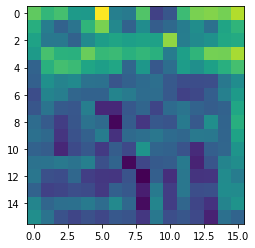

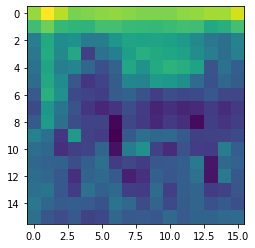

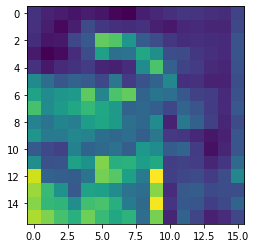

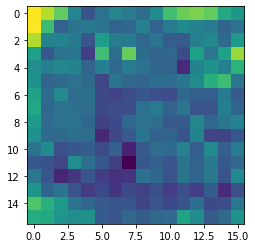

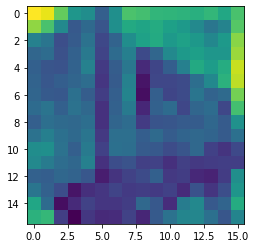

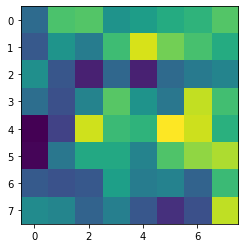

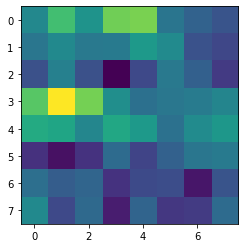

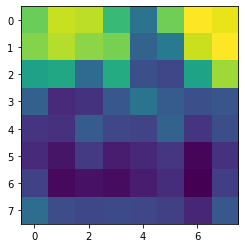

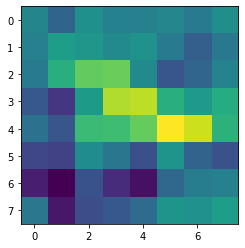

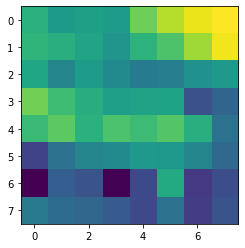

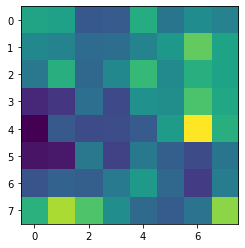

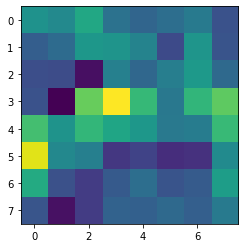

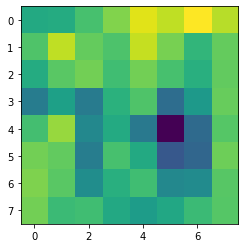

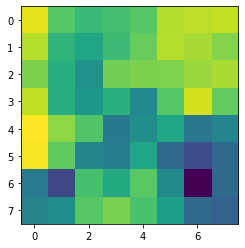

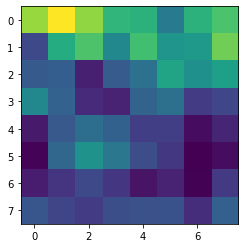

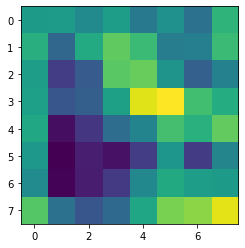

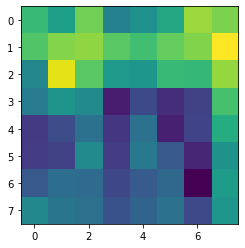

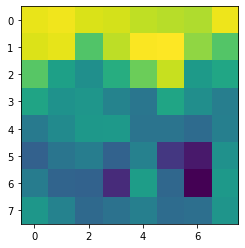

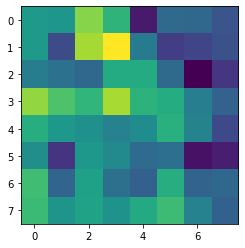

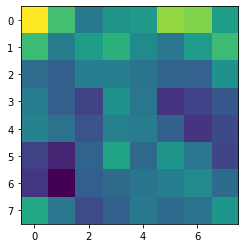

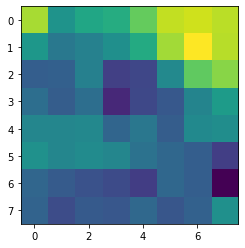

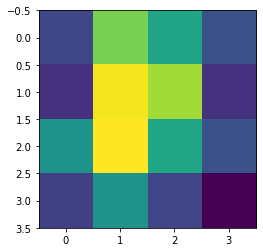

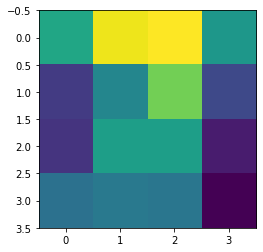

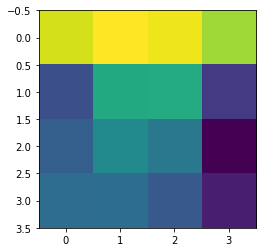

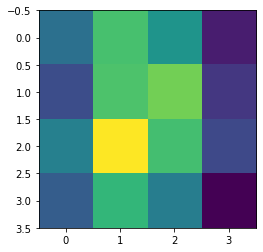

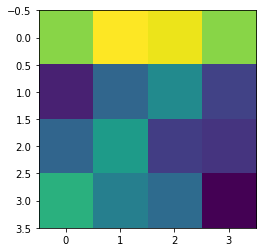

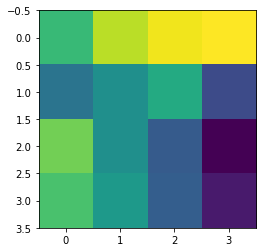

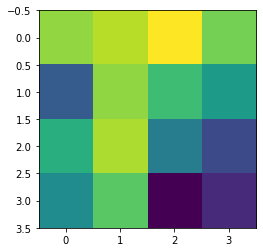

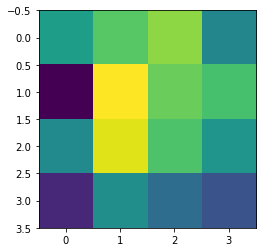

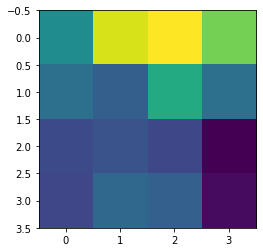

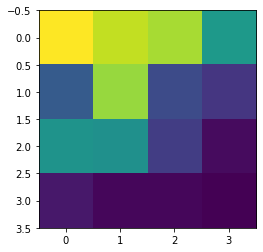

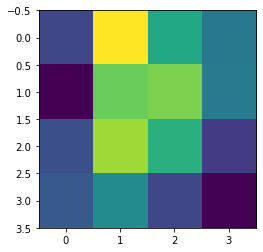

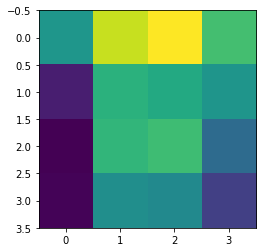

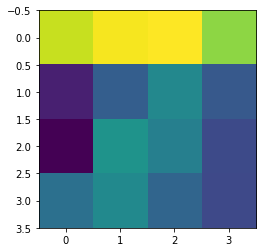

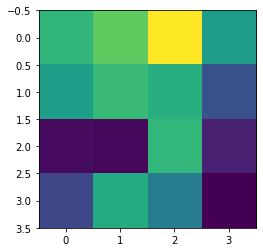

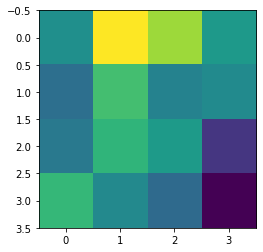

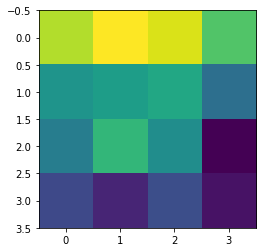

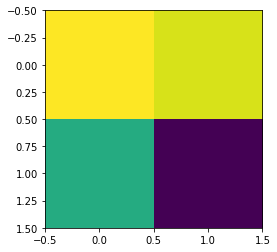

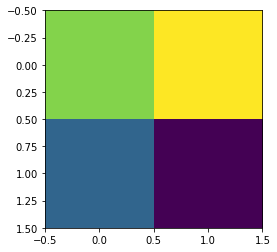

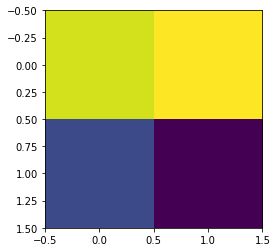

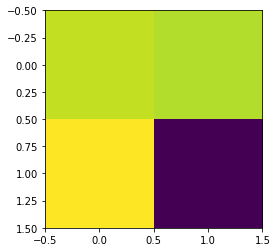

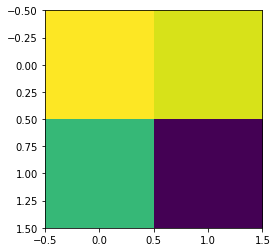

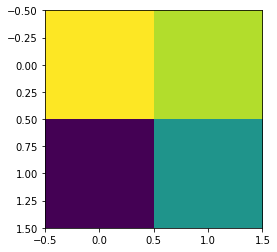

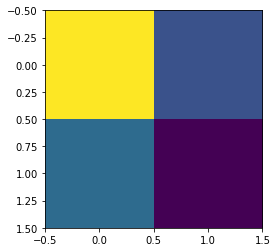

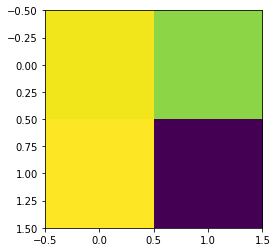

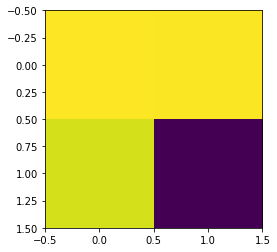

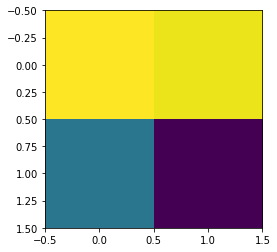

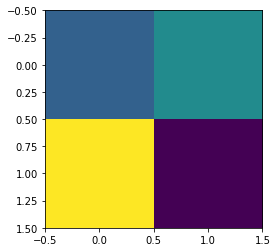

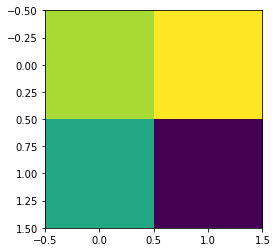

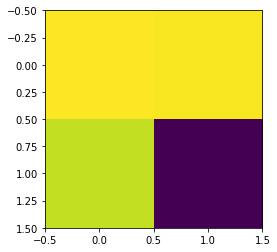

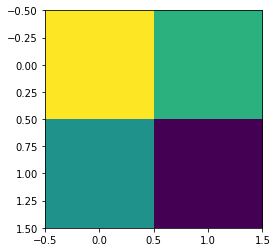

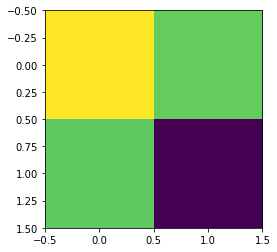

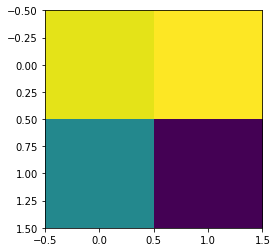

In [9]:
x = (x_train/255)[:16]
for l in model.layers:
    if isinstance(l,Block):
        l.ret_att = True
        x,att = l(x)
        for a in att:
            plt.imshow(a[...,0])
            plt.show()
        print('================================')
    else:
        x = l(x)